## Exploration of dataset (preliminary iteration, i.e. studies on cut efficiencies, objects...)

In [ ]:
import uproot

# Quick study on cuts efficiencies, to define phase space
Files stored in `/eos/user/g/glavizza/nanoAOD/ntuples_polarized/1stIter/`, with **no cuts applied** for studies on rates and #events.

In [120]:
def applycut(ssww,len_start,var,value):
    ssww = ssww[ssww[var] > value]
    len_after = len(ssww)
    print(f"cut {var:6} > {value:<6} ---> {len_after:7} / {len_start:7} = {len_after/len_start*100:5.1f}%")
    return ssww

def getCutEfficiencies(pol):
    with uproot.open(f"/eos/user/g/glavizza/nanoAOD/ntuples_polarized/noCuts/SSWW_CMrf_{pol}.root:trees/ssww/SSWW_CMrf_{pol}/Events") as sswwfile:
        ssww = sswwfile.arrays(library='pd')
        ssww['detajj'] = abs(ssww['detajj'] )
        len_start = len(ssww)

        print (f"Sample : {pol} polarization")
        print ("-----------------------")
        ssww = applycut(ssww,len_start,'mjj',500)
        ssww = applycut(ssww,len_start,'mll',20)
        ssww = applycut(ssww,len_start,'MET',30)
        ssww = applycut(ssww,len_start,'detajj',2.5)
        ssww = applycut(ssww,len_start,'ptj1',50)
        ssww = applycut(ssww,len_start,'ptj2',50)
        ssww = applycut(ssww,len_start,'ptl1',25)
        ssww = applycut(ssww,len_start,'ptl2',20)
        print ("-----------------------")
        print (f"initial ev number : {len_start}")
        print (f"> final ev number : {len(ssww)}\n\n")

getCutEfficiencies('LL')
getCutEfficiencies('TL')
getCutEfficiencies('TT')




Sample : LL polarization
-----------------------
cut mjj    > 500    --->  272805 /  397402 =  68.6%
cut mll    > 20     --->  269680 /  397402 =  67.9%
cut MET    > 30     --->  240767 /  397402 =  60.6%
cut detajj > 2.5    --->  226812 /  397402 =  57.1%
cut ptj1   > 50     --->  219255 /  397402 =  55.2%
cut ptj2   > 50     --->  175094 /  397402 =  44.1%
cut ptl1   > 25     --->  172963 /  397402 =  43.5%
cut ptl2   > 20     --->  153900 /  397402 =  38.7%
-----------------------
initial ev number : 397402
> final ev number : 153900


Sample : TL polarization
-----------------------
cut mjj    > 500    --->  307503 /  444106 =  69.2%
cut mll    > 20     --->  303632 /  444106 =  68.4%
cut MET    > 30     --->  277051 /  444106 =  62.4%
cut detajj > 2.5    --->  251182 /  444106 =  56.6%
cut ptj1   > 50     --->  247636 /  444106 =  55.8%
cut ptj2   > 50     --->  209422 /  444106 =  47.2%
cut ptl1   > 25     --->  205696 /  444106 =  46.3%
cut ptl2   > 20     --->  174701 /  444106

# A quick look to our data

In [121]:
sswwLL = uproot.open("/eos/user/g/glavizza/nanoAOD/ntuples_polarized/noCuts/SSWW_CMrf_LL.root:trees/ssww/SSWW_CMrf_LL/Events")
sswwLL = sswwLL.arrays(library='pd')
sswwLL

,XSWeight,ptj1,ptj2,etaj1,etaj2,phij1,phij2,mjj,detajj,ptl1,...,MET,ptv1,ptv2,etav1,etav2,phiv1,phiv2,pdgIdv1,pdgIdv2,weight
0,0.000001,137.511597,93.314781,3.367676,-3.867188,2.913086,2.913086,4221.691406,7.234863,63.139492,...,81.884377,83.7500,30.687500,0.321289,-1.593750,-0.503906,0.266602,16.0,14.0,0.000065
1,0.000001,93.035866,92.568840,-2.399902,2.033691,1.329590,1.329590,861.855042,4.433594,38.151119,...,33.076714,45.0000,33.000000,-0.379883,-0.876953,1.789062,1.039062,14.0,14.0,0.000065
2,0.000001,161.407455,135.826904,-1.633301,2.441406,-1.166260,-1.166260,1153.534912,4.074707,76.678917,...,36.000000,29.1875,20.500000,0.360352,1.046875,-0.986328,2.257812,-14.0,-14.0,0.000065
3,0.000001,232.658691,224.262024,1.790771,-1.835693,-2.662109,-2.662109,1438.240723,3.626465,63.718708,...,20.738623,21.1250,17.250000,-3.500000,-1.316406,0.055298,0.527344,14.0,14.0,0.000065
4,0.000001,49.871670,19.450859,2.541992,-1.063232,2.940918,2.940918,193.604050,3.605225,51.699627,...,61.554859,48.5000,28.937500,0.666016,2.570312,-2.671875,-2.031250,-14.0,-12.0,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397397,0.000001,167.441345,45.385254,3.095703,-3.535156,0.270142,0.270142,2401.332275,6.630859,76.232796,...,85.901207,64.7500,15.968750,0.196289,-0.644531,-2.156250,2.648438,14.0,12.0,0.000065
397398,0.000001,120.902267,20.596214,1.625000,-3.898926,2.720703,2.720703,792.298828,5.523926,107.020538,...,57.873859,42.0000,18.875000,-2.406250,-0.001633,-0.385742,2.765625,12.0,14.0,0.000064
397399,0.000001,96.247742,92.818321,1.073242,-3.510254,1.446045,1.446045,940.685242,4.583496,40.391712,...,74.028114,79.7500,5.921875,0.947266,2.789062,-2.429688,-1.238281,12.0,12.0,0.000065
397400,0.000001,339.184296,74.317123,-0.329102,3.061523,-1.039551,-1.039551,897.294739,3.390625,78.615410,...,197.391998,137.0000,29.250000,0.313477,0.896484,2.101562,1.410156,-16.0,16.0,0.000065


In [122]:
sswwTL = uproot.open("/eos/user/g/glavizza/nanoAOD/ntuples_polarized/noCuts/SSWW_CMrf_LL.root:trees/ssww/SSWW_CMrf_LL/Events")
sswwTL = sswwTL.arrays(library='pd')
sswwTL

,XSWeight,ptj1,ptj2,etaj1,etaj2,phij1,phij2,mjj,detajj,ptl1,...,MET,ptv1,ptv2,etav1,etav2,phiv1,phiv2,pdgIdv1,pdgIdv2,weight
0,0.000001,137.511597,93.314781,3.367676,-3.867188,2.913086,2.913086,4221.691406,7.234863,63.139492,...,81.884377,83.7500,30.687500,0.321289,-1.593750,-0.503906,0.266602,16.0,14.0,0.000065
1,0.000001,93.035866,92.568840,-2.399902,2.033691,1.329590,1.329590,861.855042,4.433594,38.151119,...,33.076714,45.0000,33.000000,-0.379883,-0.876953,1.789062,1.039062,14.0,14.0,0.000065
2,0.000001,161.407455,135.826904,-1.633301,2.441406,-1.166260,-1.166260,1153.534912,4.074707,76.678917,...,36.000000,29.1875,20.500000,0.360352,1.046875,-0.986328,2.257812,-14.0,-14.0,0.000065
3,0.000001,232.658691,224.262024,1.790771,-1.835693,-2.662109,-2.662109,1438.240723,3.626465,63.718708,...,20.738623,21.1250,17.250000,-3.500000,-1.316406,0.055298,0.527344,14.0,14.0,0.000065
4,0.000001,49.871670,19.450859,2.541992,-1.063232,2.940918,2.940918,193.604050,3.605225,51.699627,...,61.554859,48.5000,28.937500,0.666016,2.570312,-2.671875,-2.031250,-14.0,-12.0,0.000065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397397,0.000001,167.441345,45.385254,3.095703,-3.535156,0.270142,0.270142,2401.332275,6.630859,76.232796,...,85.901207,64.7500,15.968750,0.196289,-0.644531,-2.156250,2.648438,14.0,12.0,0.000065
397398,0.000001,120.902267,20.596214,1.625000,-3.898926,2.720703,2.720703,792.298828,5.523926,107.020538,...,57.873859,42.0000,18.875000,-2.406250,-0.001633,-0.385742,2.765625,12.0,14.0,0.000064
397399,0.000001,96.247742,92.818321,1.073242,-3.510254,1.446045,1.446045,940.685242,4.583496,40.391712,...,74.028114,79.7500,5.921875,0.947266,2.789062,-2.429688,-1.238281,12.0,12.0,0.000065
397400,0.000001,339.184296,74.317123,-0.329102,3.061523,-1.039551,-1.039551,897.294739,3.390625,78.615410,...,197.391998,137.0000,29.250000,0.313477,0.896484,2.101562,1.410156,-16.0,16.0,0.000065


In [123]:
sswwTT = uproot.open("/eos/user/g/glavizza/nanoAOD/ntuples_polarized/noCuts/SSWW_CMrf_TT.root:trees/ssww/SSWW_CMrf_TT/Events")
sswwTT = sswwTT.arrays(library='pd')
sswwTT

,XSWeight,ptj1,ptj2,etaj1,etaj2,phij1,phij2,mjj,detajj,ptl1,...,MET,ptv1,ptv2,etav1,etav2,phiv1,phiv2,pdgIdv1,pdgIdv2,weight
0,0.000008,582.751221,233.236465,0.783325,-0.413330,1.404785,1.404785,872.889099,1.196655,173.465103,...,185.170242,287.00,92.5000,0.134766,-1.125000,-1.773438,0.806641,14.0,14.0,0.000481
1,0.000008,321.190277,154.593964,0.619385,-2.404785,-1.261475,-1.261475,1065.126953,3.024170,40.633133,...,108.355453,39.00,22.5625,-1.152344,-1.085938,0.248535,2.359375,14.0,16.0,0.000481
2,0.000008,155.307678,150.407013,2.821777,-2.150879,2.876953,2.876953,1842.836182,4.972656,39.346611,...,129.552567,140.00,108.7500,-0.828125,1.773438,-0.098145,-2.375000,14.0,12.0,0.000476
3,0.000008,318.783875,121.250771,-1.851807,3.035156,1.204590,1.204590,2249.699219,4.886963,61.408844,...,403.553802,422.00,28.6250,0.865234,0.222656,-1.890625,-2.187500,14.0,12.0,0.000481
4,0.000008,146.900345,125.685715,1.353027,-2.353027,2.213867,2.213867,880.877563,3.706055,132.992279,...,80.146431,166.00,142.5000,1.390625,0.951172,-1.539062,2.210938,12.0,16.0,0.000481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506289,0.000008,200.250595,62.001541,-1.179443,2.180176,0.239227,0.239227,618.620178,3.359619,145.252548,...,119.868240,249.50,88.2500,0.740234,-0.354492,-2.320312,1.210938,12.0,14.0,0.000484
506290,0.000008,374.712921,138.766403,-2.318359,3.235840,0.225098,0.225098,3674.883545,5.554199,112.466957,...,95.932884,97.25,89.5000,-0.428711,0.554688,2.218750,-2.593750,14.0,14.0,0.000484
506291,0.000008,220.451538,95.531967,-2.279297,0.181702,0.312744,0.312744,527.188843,2.460999,21.109640,...,27.304964,126.00,80.5000,1.394531,0.046143,2.460938,-1.218750,14.0,14.0,0.000484
506292,0.000008,231.945938,101.621483,-1.695068,3.601074,0.516113,0.516113,2179.327881,5.296143,53.546833,...,26.724287,51.25,22.1250,1.148438,0.265625,2.351562,-2.812500,12.0,14.0,0.000484


# How many non-VBS jets?

In [124]:
from matplotlib import pyplot as plt

In [117]:
ssww = uproot.open("/eos/user/g/glavizza/nanoAOD/ntuples_polarized/cutsFlatNtuple/SSWW_polarized_CMrf.root:trees/ssww/SSWW_CMrf_LL/Events")

In [118]:
nJets = ssww['nCleanJet'].array(library='np')

(array([0.0000e+00, 0.0000e+00, 2.3141e+04, 3.9222e+04, 3.7486e+04,
        2.5841e+04, 1.4899e+04, 7.5890e+03, 3.4970e+03, 1.3790e+03,
        5.5200e+02, 1.9200e+02, 7.0000e+01, 3.1000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14.]),
 <BarContainer object of 14 artists>)

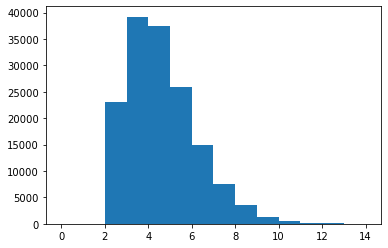

In [119]:
plt.hist(nJets,bins=range(0,15))
#plt.yscale('log')